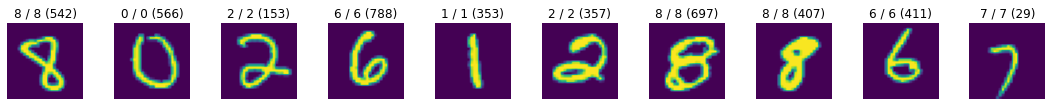

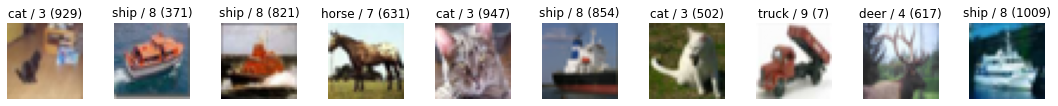

In [75]:
def fetch_tfds_as_np(name, split):
    import operator
    import numpy as np
    import tensorflow_datasets as tfds

    X, Y = operator.itemgetter("image", "label")(
        tfds.as_numpy(tfds.load(name=name, split=split,
                                data_dir=".data/", batch_size=-1)))
    X = X.astype(np.float64) / 255
    return X, Y


def fetch_tfds_info(name):
    import tensorflow_datasets as tfds

    _, info = tfds.load(name=name, split="train[:1]", data_dir=".data/",
                        batch_size=-1, with_info=True)
    return info.features["label"].names


def show_image_d(X, Y, names=None, samples=(1, 10)):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.figure(figsize=(samples[1] * 1.5, samples[0] * 1.5))
    for i in range(samples[0]):
        for j in range(samples[1]):
            idx = np.random.randint(len(Y))
            plt.subplot(*samples, i * samples[1] + j + 1)
            plt.imshow(np.clip(X[idx], 0, 1))
            plt.title("{} / {} ({})".format(
                Y[idx] if names is None else names[Y[idx]], Y[idx], idx))
            plt.axis("off")
    plt.tight_layout()
    plt.show()


show_image_d(*fetch_tfds_as_np("mnist", "train[:1024]"))
show_image_d(*fetch_tfds_as_np("cifar10", "train[:1024]"),
             fetch_tfds_info("cifar10"))


In [78]:
import numpy as np
from sklearn import svm


def flatten_XY(X, Y):
    return np.reshape(X, (X.shape[0], -1)), Y


def calc_svc_acc(svc, X, Y):
    return np.count_nonzero(Y == svc.predict(X)) / len(Y)


for i in np.logspace(-5, 5, num=10):
    svc = svm.SVC(C=i, gamma="scale").fit(
        *flatten_XY(*fetch_tfds_as_np("mnist", "train[:1024]")))
    print("SVC C={:.5f}: {}".format(i, calc_svc_acc(
        svc, *flatten_XY(*fetch_tfds_as_np("mnist", "test[:1024]")))))

SVC C=0.00001: 0.0986328125
SVC C=0.00013: 0.0986328125
SVC C=0.00167: 0.0986328125
SVC C=0.02154: 0.099609375
SVC C=0.27826: 0.896484375
SVC C=3.59381: 0.935546875
SVC C=46.41589: 0.9345703125
SVC C=599.48425: 0.9345703125
SVC C=7742.63683: 0.9345703125
SVC C=100000.00000: 0.9345703125
